#Amazon Product Data Analysis

## objective
Analyze Amazon products data to understand how pricing,discounts,
and customer ratings vary across categories and to identify high performing poducts

## Data Loading & Overview

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("amazon.csv")

In [3]:
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [4]:
df.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

In [5]:
df.dtypes

product_id             object
product_name           object
category               object
discounted_price       object
actual_price           object
discount_percentage    object
rating                 object
rating_count           object
about_product          object
user_id                object
user_name              object
review_id              object
review_title           object
review_content         object
img_link               object
product_link           object
dtype: object

## Data Cleaning & Preparation

In [6]:
df["discounted_price"]=(
    df["discounted_price"]
    .str.replace("₹","",regex=False)
    .str.replace(",","",regex=False)
)
df["actual_price"]=(
    df["actual_price"]
    .str.replace("₹","",regex=False)
    .str.replace(",","",regex=False)
)
df["discount_percentage"]=(
    df["discount_percentage"]
    .str.replace("%","",regex=False)
)

In [7]:
df["discounted_price"]=pd.to_numeric(df["discounted_price"],errors="coerce")
df["actual_price"]=pd.to_numeric(df["actual_price"],errors="coerce")
df["discount_percentage"]=pd.to_numeric(df["discount_percentage"],errors="coerce")
df["rating"]=pd.to_numeric(df["rating"],errors="coerce")
df["rating_count"]=pd.to_numeric(df["rating_count"],errors="coerce")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   float64
 4   actual_price         1465 non-null   float64
 5   discount_percentage  1465 non-null   int64  
 6   rating               1464 non-null   float64
 7   rating_count         326 non-null    float64
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  img_link             1465 non-null   object 
 15  product_link         1465 non-null   o

In [9]:
df.isnull().sum()

product_id                0
product_name              0
category                  0
discounted_price          0
actual_price              0
discount_percentage       0
rating                    1
rating_count           1139
about_product             0
user_id                   0
user_name                 0
review_id                 0
review_title              0
review_content            0
img_link                  0
product_link              0
dtype: int64

In [10]:
df=df.dropna(subset=["rating"])
df["rating_count"]=df["rating_count"].fillna(0)

In [11]:
df.isnull().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

## Feature Selection

In [12]:
analysis_df=df[
["category","discounted_price","actual_price","discount_percentage","rating","rating_count"]
]

In [13]:
analysis_df.describe()

,discounted_price,actual_price,discount_percentage,rating,rating_count
count,1464.000000,1464.000000,1464.000000,1464.000000,1464.000000
mean,3126.011906,5447.002923,47.713115,4.096585,76.862705
std,6946.625442,10878.270001,21.627422,0.291674,190.775278
min,39.000000,39.000000,0.000000,2.000000,0.000000
25%,323.750000,800.000000,32.000000,4.000000,0.000000
50%,799.000000,1650.000000,50.000000,4.100000,0.000000
75%,1999.000000,4303.750000,63.000000,4.300000,0.000000
max,77990.000000,139900.000000,94.000000,5.000000,989.000000


## Exploratory Data Analysis

### Average Rating by Category

In [14]:
avg_rating_category=(
    analysis_df
    .groupby("category")["rating"]
    .mean()
    .sort_values(ascending=False)
)
avg_rating_category

category
Computers&Accessories|Tablets                                                                                    4.6
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters                                         4.5
Electronics|Cameras&Photography|Accessories|Film                                                                 4.5
Computers&Accessories|Components|Memory                                                                          4.5
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients                                                     4.5
                                                                                                                ... 
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                               3.6
Electronics|HomeTheater,TV&Video|Accessories|3DGlasses                                                           3.5
Computers&Accessories|Accessories&Peripherals|Audio&Vid

In [15]:
top_10=avg_rating_category.head(10)

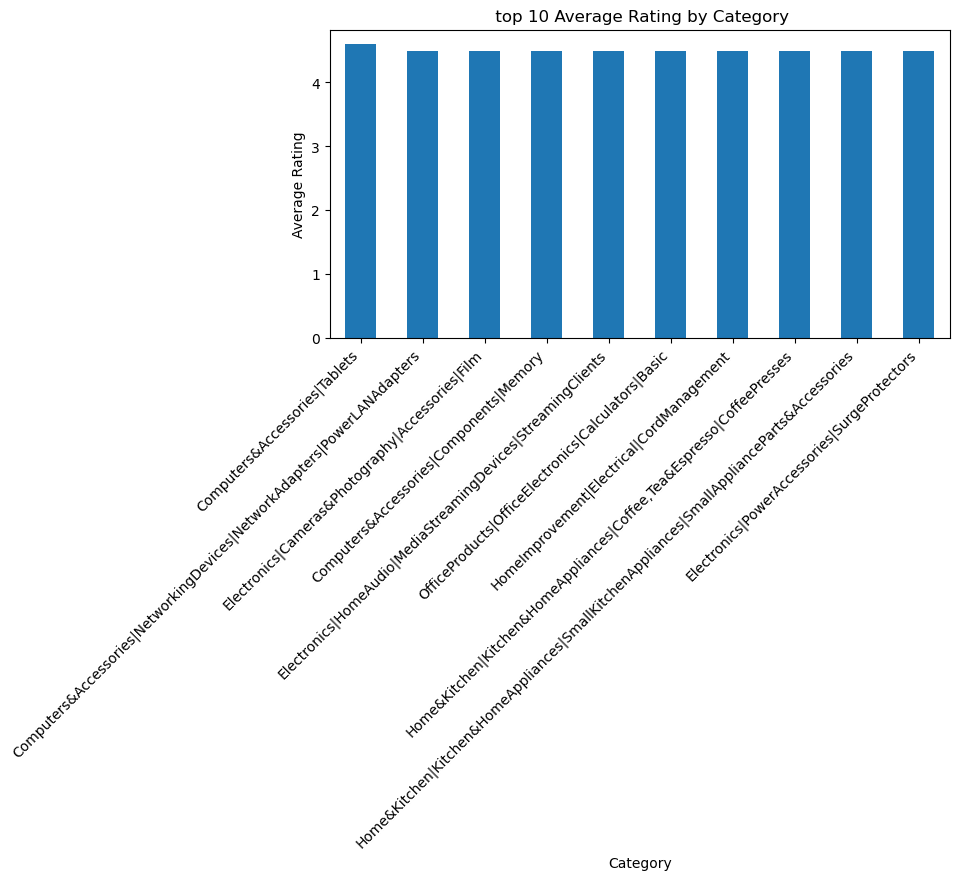

In [16]:
top_10.plot(kind="bar",figsize=(8,4))
plt.title(" top 10 Average Rating by Category")
plt.xlabel("Category")
plt.ylabel("Average Rating")
plt.xticks(rotation=45,ha="right")
plt.show()

### Product Popularity Analysis

In [17]:
top_products=(
    analysis_df
    .sort_values("rating_count",ascending=False)
    .head(10)
)
top_products

,category,discounted_price,actual_price,discount_percentage,rating,rating_count
750,Electronics|GeneralPurposeBatteries&BatteryCha...,159.0,180.0,12,4.3,989.0
1059,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,809.0,1545.0,48,3.7,976.0
823,Computers&Accessories|Accessories&Peripherals|...,389.0,1099.0,65,4.3,974.0
151,Computers&Accessories|Accessories&Peripherals|...,339.0,1099.0,69,4.3,974.0
32,Computers&Accessories|Accessories&Peripherals|...,389.0,1099.0,65,4.3,974.0
1272,"Home&Kitchen|Heating,Cooling&AirQuality|WaterH...",5499.0,11500.0,52,3.9,959.0
1259,"Home&Kitchen|Heating,Cooling&AirQuality|WaterH...",3599.0,7290.0,51,3.9,942.0
214,"Electronics|HomeTheater,TV&Video|Accessories|R...",299.0,999.0,70,3.8,928.0
1262,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,664.0,1490.0,55,4.1,925.0
147,Computers&Accessories|Accessories&Peripherals|...,499.0,899.0,44,4.2,919.0


### Price & Discount Impact On Ratings

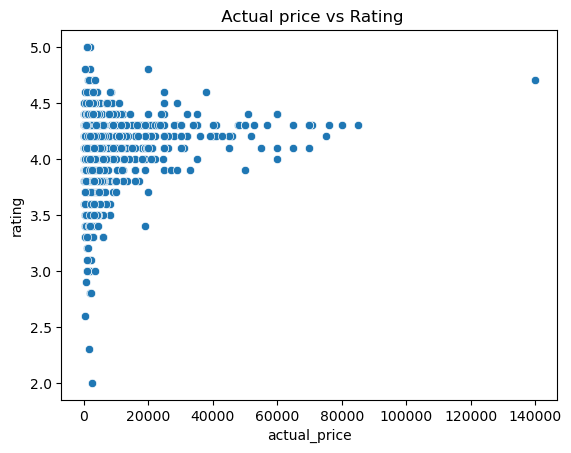

In [20]:
sns.scatterplot(
    x="actual_price",
    y="rating",
    data=analysis_df
)
plt.title(" Actual price vs Rating")
plt.show()


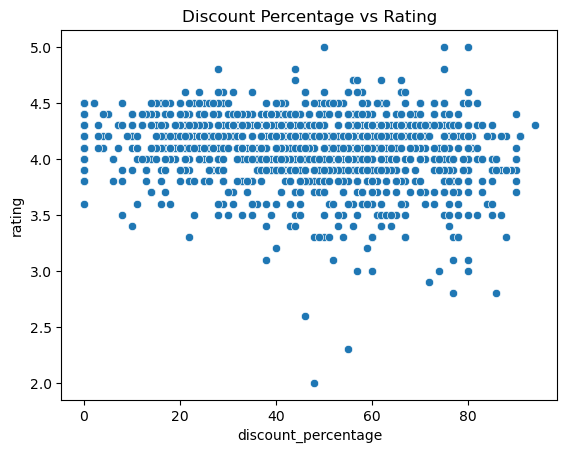

In [21]:
sns.scatterplot(
    x="discount_percentage",
    y="rating",
    data=analysis_df
)
plt.title("Discount Percentage vs Rating")
plt.show()


## Key Insights
- Certain categories consistently receive higher average ratings, indicating better customer satisfaction.
- Product price does not strongly correlate with customer ratings.
- Products with higher rating counts dominate popularity, suggesting strong social proof effects.

## Conclusion
This analysis highlights how pricing, discounts, and customer feedback influence product performance on Amazon and provides insights for data-driven decision-making.